<h1># Part 1: Loading datasets, cleaning and joining datasets</h1>

<h3>1.1 Loading Libraries</h3>

In [179]:
import pandas as pd
import os
import yaml
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns
import plotly.graph_objs as go
from ipywidgets import interact, IntSlider
import plotly.express as px

<h3>1.2 Loading Datasets</h3>

In [180]:
def get_config():
    with open("config.yaml", "r") as my_config:
        config = yaml.safe_load(my_config)
    return config
config = get_config()
        
df_consumption = pd.read_csv(config['consumption'])
df_death = pd.read_csv(config['death'])
df_population = pd.read_csv(config['population'])


# Data Inspetion

In [181]:
# NOTE: ADD MORE INSPECTION PARTS TO THIS FUNCTIONS. TRY TO SEE ALL THE ASPECTS OF YOUR DATASETS
# ADD DUPLICATIONS, The number of datapoints per country both for alcohol consumption and death rate.
# The number of the countries you have
def df_inspetion1(df_consumption, df_death, df_population):

    # Data Types
    print(f'The types of df_consumption columns\n{df_consumption.dtypes}')
    print(f'\nThe types of df_death columns\n{df_death.dtypes}')
    print(f'\nThe types of df_death columns\n{df_population.dtypes}')

    # Check for missing data
    print(df_consumption.isnull().sum())
    print(df_death.isnull().sum())
    print(df_population.isnull().sum())


df_inspetion1(df_consumption, df_death, df_population)   

The types of df_consumption columns
Entity                                                                                                   object
Code                                                                                                     object
Year                                                                                                      int64
Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)    float64
dtype: object

The types of df_death columns
Country                                                                                                                 object
Code                                                                                                                    object
Year                                                                                                                     int64
Deaths that are from all causes attributed to high systolic blood pressure, in both sexes 

# Explain why you should drop Nan values's row. (if you decided to not investigate egions and continents)
# Put the ispection part inside inspection functions

In [182]:
df_consumption['Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)'].max()

20.5

<h3>1.3: Data Cleaning</h3> 

Put everything inside the function in a logical manner.

In [183]:
# Remove rows with NaN values (EXPLANATION)

df_consumption = df_consumption.dropna()

df_death = df_death.dropna()


In [184]:
#Check for duplicates across all columns, if duplicates found, delete one row
df_duplicate_consumption = df_consumption[df_consumption.duplicated()]
df_duplicate_death = df_death[df_death.duplicated()]
df_duplicate_population = df_population[df_population.duplicated()]

# Remove duplicate rows
df_consumption = df_consumption.drop_duplicates()
df_death = df_death.drop_duplicates()
df_population = df_population.drop_duplicates()

# Ensure 'Year' is of integer type
df_consumption['Year'] = df_consumption['Year'].astype(int)
df_death['Year'] = df_death['Year'].astype(int)
df_population['Year'] = df_population['Year'].astype(int)

In [185]:
#Rename the Title Entity to Country
df_consumption.rename(columns = {'Entity':'Country','Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)':'Alchohol consumption'
                                 },inplace = True)
df_consumption
#Rename the Title Entity to Country
df_death.rename(columns={'Entity':'Country','Deaths that are from all causes attributed to alcohol use, in both sexes aged all ages':'Deaths due to Alchohol'},inplace = True)
#df_death

In [186]:
#filter related rows from each datasets(for merging 3 datasets based on Year and country I had to remove years except 2000,2005,2010,2015,2018)
df_death = df_death[df_death['Year'].isin([2000, 2005, 2010, 2015, 2018])]
df_death.head()


,Country,Code,Year,"Deaths that are from all causes attributed to high systolic blood pressure, in both sexes aged all ages","Deaths that are from all causes attributed to diet high in sodium, in both sexes aged all ages","Deaths that are from all causes attributed to diet low in whole grains, in both sexes aged all ages",Deaths due to Alchohol,"Deaths that are from all causes attributed to diet low in fruits, in both sexes aged all ages","Deaths that are from all causes attributed to unsafe water source, in both sexes aged all ages","Deaths that are from all causes attributed to secondhand smoke, in both sexes aged all ages",...,"Deaths that are from all causes attributed to drug use, in both sexes aged all ages","Deaths that are from all causes attributed to low bone mineral density, in both sexes aged all ages","Deaths that are from all causes attributed to vitamin a deficiency, in both sexes aged all ages","Deaths that are from all causes attributed to child stunting, in both sexes aged all ages","Deaths that are from all causes attributed to non-exclusive breastfeeding, in both sexes aged all ages","Deaths that are from all causes attributed to iron deficiency, in both sexes aged all ages","Deaths that are from all causes attributed to ambient particulate matter pollution, in both sexes aged all ages","Deaths that are from all causes attributed to low physical activity, in both sexes aged all ages","Deaths that are from all causes attributed to no access to handwashing facility, in both sexes aged all ages","Deaths that are from all causes attributed to high ldl cholesterol, in both sexes aged all ages"
10,Afghanistan,AFG,2000,29998.512,1259.5785,8328.075,427.25616,4174.3380,9941.9700,6227.1470,...,311.84225,430.62665,3855.2944,12964.9210,4194.9717,897.32550,3541.8700,3013.0520,8233.2160,14938.048
15,Afghanistan,AFG,2005,30089.117,1276.1282,8415.446,451.53430,4165.9834,10118.1620,6272.2593,...,390.27414,454.32657,1243.2245,8380.3150,3518.7990,1006.88530,3732.9456,3152.8270,8033.1580,15250.393
20,Afghanistan,AFG,2010,30352.130,1247.5607,8511.792,491.64770,4022.3460,6020.6436,5714.1074,...,463.43330,515.36005,1413.2369,6192.1600,2661.0232,980.61330,4922.3520,3344.4604,5535.3350,15760.845
25,Afghanistan,AFG,2015,32639.936,1301.6910,9228.382,521.93640,4163.0680,4796.1630,5785.0560,...,566.39777,589.87384,697.5783,4205.5890,2310.9731,832.58203,7675.1245,3694.9897,4693.1943,17378.768
28,Afghanistan,AFG,2018,35262.600,1400.2490,10085.003,574.54584,4486.7295,3993.8105,5987.4893,...,673.01670,642.23627,608.2867,3535.8152,1881.7853,778.18884,8131.1520,4021.1040,4077.5671,19182.750


In [187]:

new_columns = ['Country','Code','Year','Deaths due to Alchohol']

df_new_death = df_death[new_columns]

df_new_death.to_csv('df_new_death.csv', index=False)

In [188]:
df_new_death = df_new_death.reset_index().drop(columns='index')
df_death = df_death.reset_index().drop(columns='index')
df_consumption = df_consumption.reset_index().drop(columns='index')

<h3>1.4: Merging Datasets</h3>

Put eveythig in functions

MOre explanation

In [189]:
#merge 2 datasets(Merged BASED on Country and Year column)
df_merge = pd.merge(df_consumption,df_new_death, on=['Country','Year', 'Code'], how='inner')
df_merge.head()

,Country,Code,Year,Alchohol consumption,Deaths due to Alchohol
0,Afghanistan,AFG,2010,0.21,491.64770
1,Afghanistan,AFG,2015,0.21,521.93640
2,Afghanistan,AFG,2018,0.21,574.54584
3,Albania,ALB,2000,6.57,511.38745
4,Albania,ALB,2005,7.65,640.57010


In [190]:
# Merge population dataset with the main dataset(to create Mortality for each individual country ,total population is needed)

df = pd.merge(df_merge,df_population, on=['Country','Year'], how='inner')
df

,Country,Code,Year,Alchohol consumption,Deaths due to Alchohol,Total Population
0,Afghanistan,AFG,2010,0.21,491.64770,27803000
1,Afghanistan,AFG,2015,0.21,521.93640,33361000
2,Afghanistan,AFG,2018,0.21,574.54584,36161000
3,Albania,ALB,2000,6.57,511.38745,3196000
4,Albania,ALB,2005,7.65,640.57010,3047000
...,...,...,...,...,...,...
889,Zimbabwe,ZWE,2000,2.46,4209.50540,11791000
890,Zimbabwe,ZWE,2005,2.77,4486.24000,12196000
891,Zimbabwe,ZWE,2010,3.93,4939.37400,12753000
892,Zimbabwe,ZWE,2015,4.92,4853.71830,14006000


In [191]:
#remove Column name Code (as i already have the Country column so i dont need the code Column)

df = df.drop(columns='Code')
df

,Country,Year,Alchohol consumption,Deaths due to Alchohol,Total Population
0,Afghanistan,2010,0.21,491.64770,27803000
1,Afghanistan,2015,0.21,521.93640,33361000
2,Afghanistan,2018,0.21,574.54584,36161000
3,Albania,2000,6.57,511.38745,3196000
4,Albania,2005,7.65,640.57010,3047000
...,...,...,...,...,...
889,Zimbabwe,2000,2.46,4209.50540,11791000
890,Zimbabwe,2005,2.77,4486.24000,12196000
891,Zimbabwe,2010,3.93,4939.37400,12753000
892,Zimbabwe,2015,4.92,4853.71830,14006000


In [192]:
#remove NaN value
df.dropna(how='any',inplace=True)
df.head()

,Country,Year,Alchohol consumption,Deaths due to Alchohol,Total Population
0,Afghanistan,2010,0.21,491.64770,27803000
1,Afghanistan,2015,0.21,521.93640,33361000
2,Afghanistan,2018,0.21,574.54584,36161000
3,Albania,2000,6.57,511.38745,3196000
4,Albania,2005,7.65,640.57010,3047000


In [193]:
#save dataset
df.to_csv('df.csv')

In [194]:
#Remove World from df because my search is based on country

df = df[df["Country"] != 'World']

# Presenting section
## Make it less hard-coded

In [195]:
# Filter the dataset for each specified year
def filtered_year(df, year):
    return df[df['Year'] == year]



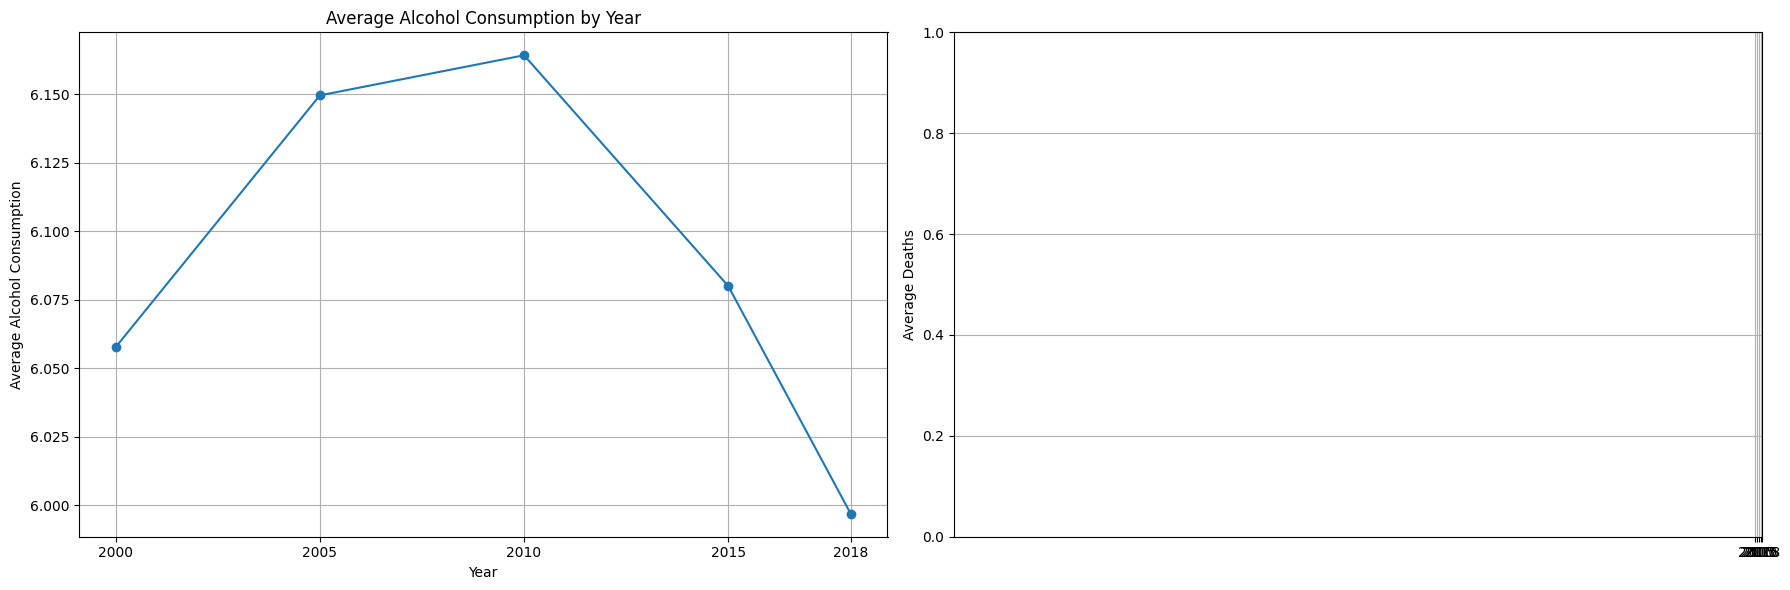

In [196]:
# Calculate mean alcohol consumption and deaths for each year
mean_consumption = {
    2000: df_2000['Alchohol consumption'].mean(),
    2005: df_2005['Alchohol consumption'].mean(),
    2010: df_2010['Alchohol consumption'].mean(),
    2015: df_2015['Alchohol consumption'].mean(),
    2018: df_2018['Alchohol consumption'].mean()
}

mean_deaths = {
    2000: df_2000['Deaths due to Alchohol'].mean(),
    2005: df_2005['Deaths due to Alchohol'].mean(),
    2010: df_2010['Deaths due to Alchohol'].mean(),
    2015: df_2015['Deaths due to Alchohol'].mean(),
    2018: df_2018['Deaths due to Alchohol'].mean()
}

# Plotting side by side
fig, axs = plt.subplots(1, 2, figsize=(18, 6))  # 1 row, 2 columns

# Plot for Average Alcohol Consumption
axs[0].plot(list(mean_consumption.keys()), list(mean_consumption.values()), marker='o', linestyle='-')
axs[0].set_title('Average Alcohol Consumption by Year')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Average Alcohol Consumption')
axs[0].grid(True)
axs[0].set_xticks(list(mean_consumption.keys()))

#Plot for Average Deaths due to Alcoh
trends_filtered = yearly_trends[~yearly_trends['Year'].astype(str).str.endswith(('.0', '.5'))]

axs[1].set_ylabel('Average Deaths')
axs[1].grid(True)
axs[1].set_xticks(list(mean_deaths.keys()))

plt.tight_layout()
plt.show()


Add description along with explanation

## Functions
## Choose one of the architecture in this section

In [197]:
# Step 1: Calculate Mortality Rate due to Alcohol per 100,000 population
df['Mortality Rate'] = (df['Deaths due to Alchohol'] / df['Total Population']) * 100000 # Explain this in-detail

# To view the first few rows of the transformed main DataFrame
df.head()

,Country,Year,Alchohol consumption,Deaths due to Alchohol,Total Population,Mortality Rate
0,Afghanistan,2010,0.21,491.64770,27803000,1.768326
1,Afghanistan,2015,0.21,521.93640,33361000,1.564511
2,Afghanistan,2018,0.21,574.54584,36161000,1.588855
3,Albania,2000,6.57,511.38745,3196000,16.000859
4,Albania,2005,7.65,640.57010,3047000,21.022977


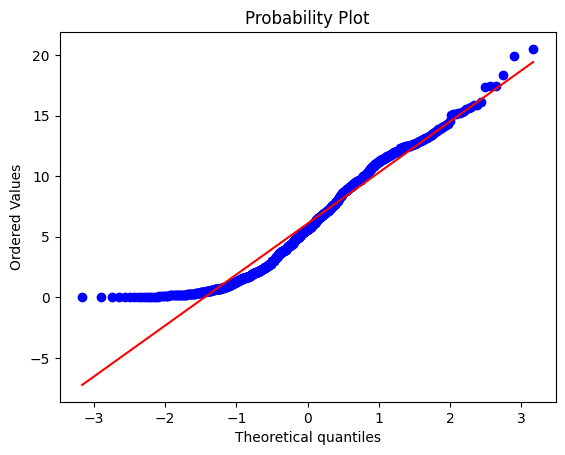

In [225]:
import numpy as np 
import pylab 
import scipy.stats as stats

measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(df['Alchohol consumption'], dist="norm", plot=pylab)
pylab.show()

In [224]:
from scipy.stats import anderson
res = anderson(df['Alchohol consumption'])
res

AndersonResult(statistic=11.413999683994462, critical_values=array([0.573, 0.653, 0.784, 0.914, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=6.089512304250559, scale=4.299929764962567)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [198]:
# Step 2: Aggregate data by Year to analyze global trends over time
# Calculate mean alcohol consumption and mean mortality rate per year
yearly_trends = df.groupby('Year').agg({
    'Alchohol consumption': 'mean',
    'Mortality Rate': 'mean'
}).reset_index()

# To view the yearly trends
yearly_trends.head()


,Year,Alchohol consumption,Mortality Rate
0,2000,6.057767,34.090226
1,2005,6.149659,35.213191
2,2010,6.164311,35.117312
3,2015,6.080077,33.854617
4,2018,5.996945,34.047410


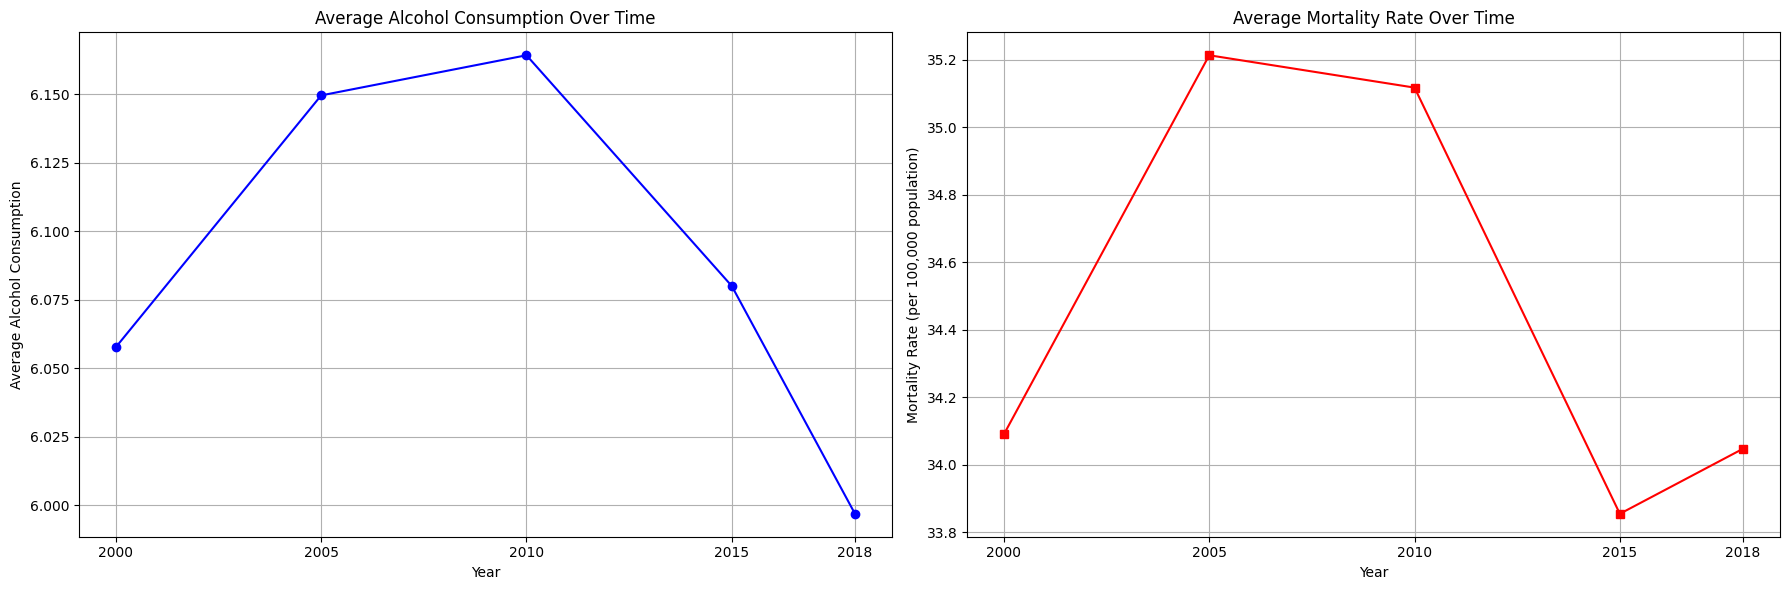

In [199]:
# You don't need this command
yearly_trends_filtered = yearly_trends[~yearly_trends['Year'].astype(str).str.endswith(('.0', '.5'))]

# Plotting without years ending in .0 or .5
plt.figure(figsize=(18, 6))

# Alcohol Consumption Plot
plt.subplot(1, 2, 1)
plt.plot(yearly_trends_filtered['Year'], yearly_trends_filtered['Alchohol consumption'], marker='o', linestyle='-', color='blue')
plt.title('Average Alcohol Consumption Over Time')
plt.xlabel('Year')
plt.ylabel('Average Alcohol Consumption')
plt.xticks(yearly_trends_filtered['Year'].unique())  # Displaying only the filtered years on the x-axis
plt.grid(True)

# Mortality Rate Plot
plt.subplot(1, 2, 2)
plt.plot(yearly_trends_filtered['Year'], yearly_trends_filtered['Mortality Rate'], marker='s', linestyle='-', color='red')
plt.title('Average Mortality Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Mortality Rate (per 100,000 population)')
plt.xticks(yearly_trends_filtered['Year'].unique())  # Displaying only the filtered years on the x-axis
plt.grid(True)

plt.tight_layout()  # Adjust subplot parameters
plt.show()  # Display the plots


There is a positive correlation between alcohol consumption and mortality rate due to alcohol. This means that as alcohol consumption increases, the mortality rate due to alcohol also increases. (ADD DECEASES HERE)

Also, explain the difference between this plot with the privious plot.

Add a heatmap

Data Analysis

In [200]:
# 1. Descriptive Statistics for alcohol consumption and mortality rates
# FUNCTION
descriptive_stats = df[['Alchohol consumption', 'Mortality Rate']].describe()

# 2. Correlation Analysis between alcohol consumption and mortality rates
correlation_analysis = df[['Alchohol consumption', 'Mortality Rate']].corr()

# 3. Comparative Analysis: Identifying countries with significant changes
# We will calculate the mean and standard deviation for alcohol consumption and mortality rates for each country
comparative_analysis = df.groupby('Country').agg({
    'Alchohol consumption': ['mean', 'std'],
    'Mortality Rate': ['mean', 'std']
}).reset_index()

# To view the descriptive statistics
print(descriptive_stats)

# To view the correlation analysis
print(correlation_analysis)

# To view the comparative analysis for the first few countries
print(comparative_analysis.head())


       Alchohol consumption  Mortality Rate
count            894.000000      894.000000
mean               6.089512       34.461728
std                4.299930       27.282453
min                0.000000        0.668772
25%                2.190000       15.065044
50%                5.615000       31.406040
75%                9.487500       45.476747
max               20.500000      214.849635
                      Alchohol consumption  Mortality Rate
Alchohol consumption              1.000000        0.766603
Mortality Rate                    0.766603        1.000000
       Country Alchohol consumption           Mortality Rate          
                               mean       std           mean       std
0  Afghanistan                0.210  0.000000       1.640564  0.111313
1      Albania                7.164  0.511253      22.069201  3.845094
2      Algeria                0.784  0.165167       2.588453  0.390011
3      Andorra               11.794  1.056092      48.894803  3.598349
4

In [201]:
comparative_analysis['Alchohol consumption']['mean']

0       0.2100
1       7.1640
2       0.7840
3      11.7940
4       6.1420
        ...   
176     7.6400
177     5.2520
178     0.2832
179     5.3620
180     3.7500
Name: mean, Length: 181, dtype: float64

<Axes: >

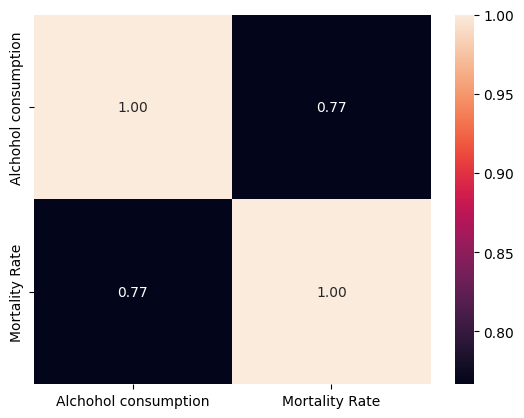

In [202]:
sns.heatmap(correlation_analysis, annot=True, fmt=".2f")

/tmp/ipykernel_1561400/532524976.py:18: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipykernel_1561400/532524976.py:30: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



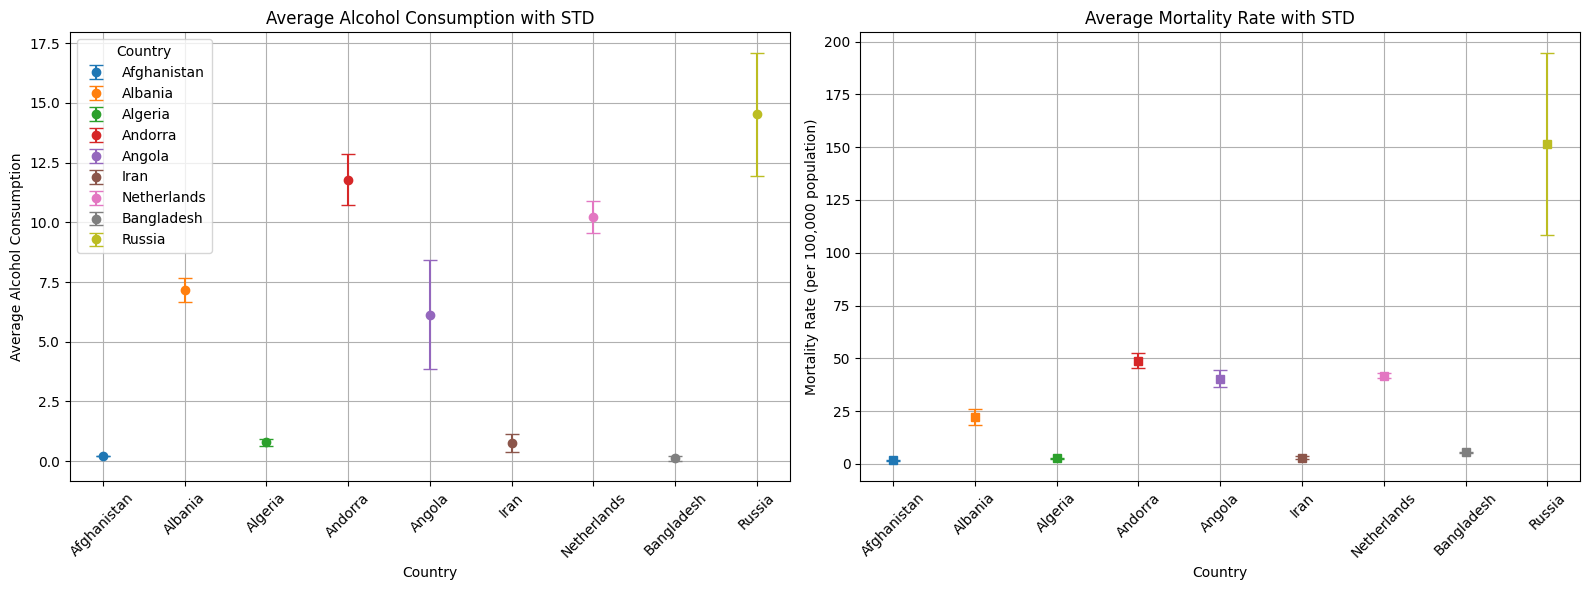

In [203]:
# Plotting Alcohol Consumption and Mortality Rate with Mean and STD Indicators
# NOTE:Think about the colors, Add Functions 
# Selecting a few countries for illustrative plotting
sample_countries = config['countires_to_draw']
sample_data = comparative_analysis[comparative_analysis['Country'].isin(sample_countries)]

# Setting up the figure and axes
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Alcohol Consumption Plot
for country in sample_countries:
    country_data = sample_data[sample_data['Country'] == country]
    ax[0].errorbar(country, country_data['Alchohol consumption']['mean'], yerr=country_data['Alchohol consumption']['std'], fmt='o', capsize=5, label=country)

ax[0].set_title('Average Alcohol Consumption with STD')
ax[0].set_xlabel('Country')
ax[0].set_ylabel('Average Alcohol Consumption')
ax[0].set_xticklabels(sample_countries, rotation=45)
ax[0].grid(True)
ax[0].legend(title='Country')

# Mortality Rate Plot
for country in sample_countries:
    country_data = sample_data[sample_data['Country'] == country]
    ax[1].errorbar(country, country_data['Mortality Rate']['mean'], yerr=country_data['Mortality Rate']['std'], fmt='s', capsize=5, label=country)

ax[1].set_title('Average Mortality Rate with STD')
ax[1].set_xlabel('Country')
ax[1].set_ylabel('Mortality Rate (per 100,000 population)')
ax[1].set_xticklabels(sample_countries, rotation=45)
ax[1].grid(True)

plt.tight_layout()
plt.show()


In [204]:
df[df.Country == 'Angola']

,Country,Year,Alchohol consumption,Deaths due to Alchohol,Total Population,Mortality Rate
18,Angola,2000,2.76,5664.489,16127000,35.124257
19,Angola,2005,4.89,8071.080,19104000,42.248116
20,Angola,2010,8.16,10470.952,22925000,45.674818
21,Angola,2015,7.96,11271.206,27624000,40.802223
22,Angola,2018,6.94,11702.594,30739000,38.070835


<h1>Time series analysis</h1>

In [205]:
global_trends = df.groupby('Year').agg({
    'Alchohol consumption': 'mean',
    'Mortality Rate': 'mean'
}).reset_index()

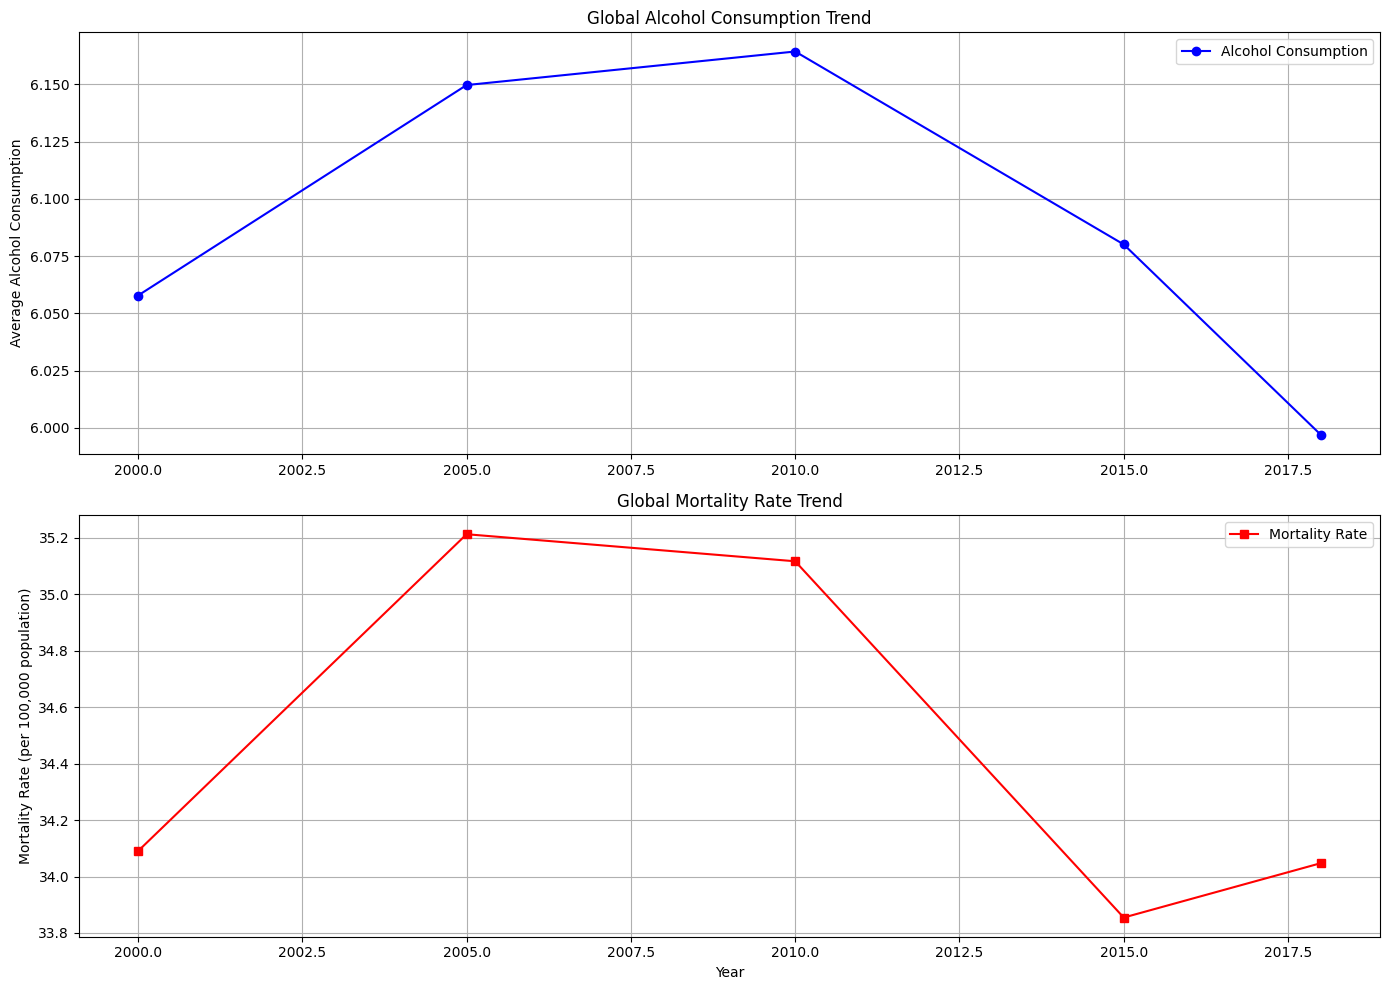

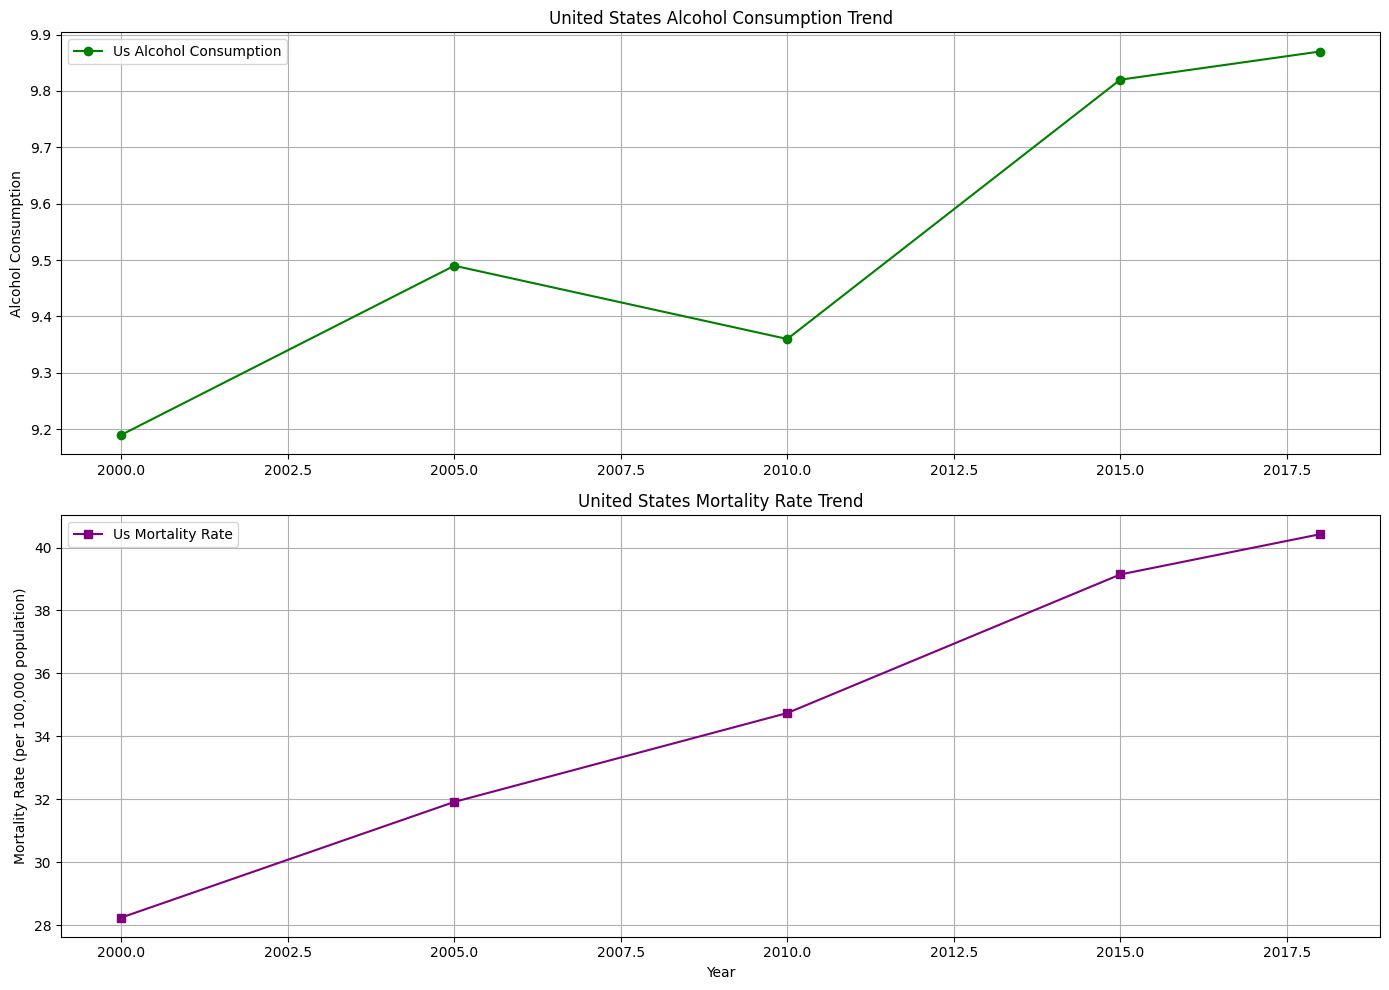

In [206]:
# Plotting Global Trends
plt.figure(figsize=(14, 10))

# Global Alcohol Consumption Trend
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
plt.plot(global_trends['Year'], global_trends['Alchohol consumption'], marker='o', linestyle='-', color='blue',label='Alcohol Consumption')
plt.title('Global Alcohol Consumption Trend')
plt.ylabel('Average Alcohol Consumption')
plt.grid(True)
plt.legend()

# Global Mortality Rate Trend
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
plt.plot(global_trends['Year'], global_trends['Mortality Rate'], marker='s', linestyle='-', color='red',label='Mortality Rate')
plt.title('Global Mortality Rate Trend')
plt.xlabel('Year')
plt.ylabel('Mortality Rate (per 100,000 population)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Time Series Analysis for a Specific Country (Example: United States)
country_name = 'United States'
country_data = df[df['Country'] == country_name]

# Plotting Country-Specific Trends
plt.figure(figsize=(14, 10))

# Country-Specific Alcohol Consumption Trend
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
plt.plot(country_data['Year'], country_data['Alchohol consumption'], marker='o', linestyle='-', color='green', label='Us Alcohol Consumption')
plt.title(f'{country_name} Alcohol Consumption Trend')
plt.ylabel('Alcohol Consumption')
plt.legend()
plt.grid(True)

# Country-Specific Mortality Rate Trend
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
plt.plot(country_data['Year'], country_data['Mortality Rate'], marker='s', linestyle='-', color='purple',label='Us Mortality Rate')
plt.title(f'{country_name} Mortality Rate Trend')
plt.xlabel('Year')
plt.ylabel('Mortality Rate (per 100,000 population)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

<h1> Global Alchohol consumption Trend with Interactive plt (PLot this based on countries)</h1>

In [208]:
# Ensuring the data is sorted by Year if it's not already
global_trends_sorted = global_trends.sort_values('Year')

# Function to update the plot
def update_plot(selected_year):
    filtered_data = global_trends_sorted[global_trends_sorted['Year'] <= selected_year]
    
    # Create a Plotly express line plot
    fig = px.line(filtered_data, x='Year', y='Alchohol consumption', 
                  title='Global Alcohol Consumption Trend',
                  labels={'Alchohol consumption': 'Average Alcohol Consumption'})
    
    # Update layout
    fig.update_layout(transition_duration=500)
    fig.show()

# Create a slider
slider = IntSlider(
    value=global_trends_sorted['Year'].max(),
    min=global_trends_sorted['Year'].min(),
    max=global_trends_sorted['Year'].max(),
    step=1,
    description='Year:',
    continuous_update=False
)

# Display the interactive slider and plot
interact(update_plot, selected_year=slider)



interactive(children=(IntSlider(value=2018, continuous_update=False, description='Year:', max=2018, min=2000),…

<function __main__.update_plot(selected_year)>

<h1>Correlation Analysis</h1>

In [209]:
# Alchohol consumption and Mortality Rate columns (Repetative inf)
correlation_analysis = df[['Alchohol consumption', 'Mortality Rate']].corr()

print(correlation_analysis)


                      Alchohol consumption  Mortality Rate
Alchohol consumption              1.000000        0.766603
Mortality Rate                    0.766603        1.000000


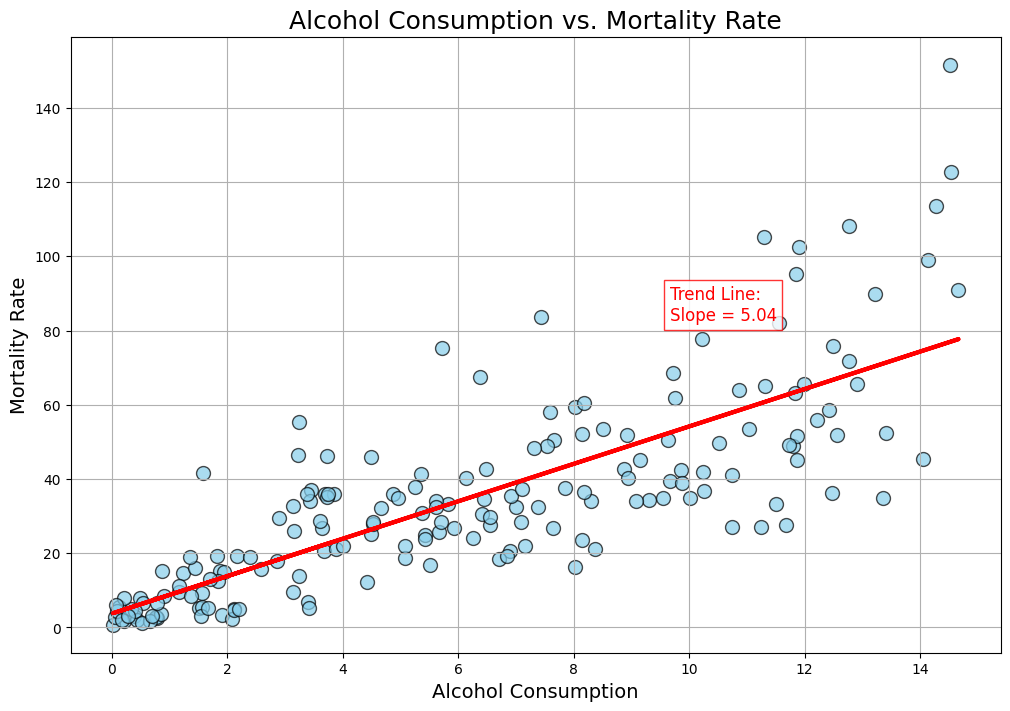

Correlation coefficient: 0.77


In [210]:
df.dropna(subset=["Mortality Rate"], inplace=True)

x = comparative_analysis['Alchohol consumption']['mean']
y = comparative_analysis['Mortality Rate']['mean']

# comparative_analysis['Alchohol consumption']['mean']

# Creating the scatter plot 
plt.figure(figsize=(12, 8))  
plt.scatter(x, y, alpha=0.7, s=100, edgecolor='k', color='skyblue') 

# Adding a trend line
m, b = np.polyfit(x, y, 1)  # coefficients of the line
plt.plot(x, m*x + b, color='red', linewidth=3)  

# Adding labels and title 
plt.title('Alcohol Consumption vs. Mortality Rate', fontsize=18)
plt.xlabel('Alcohol Consumption', fontsize=14)
plt.ylabel('Mortality Rate', fontsize=14)
plt.grid(True)

# the trend line
plt.text(x.max()-5, m*x.max() + b + 5, f'Trend Line:\nSlope = {m:.2f}', color='red', fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='red'))

plt.show()


# Correlation c
correlation = np.corrcoef(df['Alchohol consumption'], df['Mortality Rate'])[0, 1]
print(f'Correlation coefficient: {correlation:.2f}')

Based on the scatter plot, Although we see slightly upward trend, we can form the following hypothesis:

The correlation coefficient is 0.77 which indicates it is moderately likely Alcohol consumption has relations to Mortality Rate. Correlation is not always result in  causation. Further studies and conditions are necessary to prove this hypothesis. Therefore, I failed to reject my hypothesis.

In [221]:
df[df['Alchohol consumption'] <=1]

,Country,Year,Alchohol consumption,Deaths due to Alchohol,Total Population,Mortality Rate
0,Afghanistan,2010,0.210,491.64770,27803000,1.768326
1,Afghanistan,2015,0.210,521.93640,33361000,1.564511
2,Afghanistan,2018,0.210,574.54584,36161000,1.588855
8,Algeria,2000,0.580,624.86127,30561000,2.044636
9,Algeria,2005,0.810,776.61330,32744000,2.371773
...,...,...,...,...,...,...
879,Yemen,2000,0.790,809.17523,18371000,4.404634
880,Yemen,2005,0.340,717.49530,21010000,3.415018
881,Yemen,2010,0.180,670.63470,24383000,2.750419
882,Yemen,2015,0.055,708.64343,28139000,2.518367
